In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/adityasuyal/Desktop/archive/cars_ds_final.csv")

In [3]:
data

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [4]:
# Select only the 'Price' and 'Mileage' columns from the DataFrame
data = data[['Model', 'Ex-Showroom_Price','Cylinders', 'Valves_Per_Cylinder', 'Cylinder_Configuration',  ]]


In [5]:
data.head(2)

,Model,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration
0,Nano Genx,"Rs. 2,92,667",2.0,2.0,In-line
1,Nano Genx,"Rs. 2,36,447",2.0,2.0,In-line


In [6]:
data = data[data['Cylinder_Configuration'] != 'Flat']

In [7]:
data.head()

,Model,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration
0,Nano Genx,"Rs. 2,92,667",2.0,2.0,In-line
1,Nano Genx,"Rs. 2,36,447",2.0,2.0,In-line
2,Nano Genx,"Rs. 2,96,661",2.0,2.0,In-line
3,Nano Genx,"Rs. 3,34,768",2.0,2.0,In-line
4,Nano Genx,"Rs. 2,72,223",2.0,2.0,In-line


In [8]:
data['Cylinder_Configuration'] = data['Cylinder_Configuration'].replace('In-line',1)

In [9]:
data = data[data['Cylinder_Configuration'] != 'W']
data = data[data['Cylinder_Configuration'] != 'V']

In [10]:
value_counts = data['Valves_Per_Cylinder'].value_counts()
print(value_counts)

Valves_Per_Cylinder
4.0     945
2.0      42
12.0      4
16.0      2
1.0       2
3.0       2
8.0       1
Name: count, dtype: int64


In [11]:
data = data.dropna(subset=['Valves_Per_Cylinder'])



In [12]:
data['Valves_Per_Cylinder'] = data['Valves_Per_Cylinder'].astype(int)

Valves_Per_Cylinder
4     945
2      42
12      4
16      2
1       2
3       2
8       1
Name: count, dtype: int64


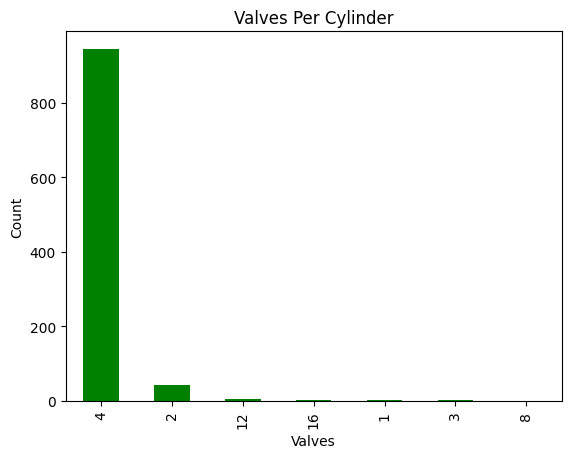

In [13]:
value_counts = data['Valves_Per_Cylinder'].value_counts()
print(value_counts)

value_counts.plot(kind='bar', color='green')

# Customize the plot (optional)
plt.title('Valves Per Cylinder')
plt.xlabel('Valves')
plt.ylabel('Count')

# Show the plot
plt.show()

In [14]:
data = data.dropna(subset =['Cylinders'])
data['Cylinders'] = data['Cylinders'].astype(int)


In [15]:
data['Price'] = data['Ex-Showroom_Price'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/rs/vfdywc3n3cx5zbbl31wgk4180000gn/T/ipykernel_47703/1038126309.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['Price'] = data['Ex-Showroom_Price'].str.extract('(\d+)')


In [16]:
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].str.replace('Rs. ', '', regex=False).str.replace(',', '', regex=False).astype(int)

In [17]:
data.head()

,Model,Ex-Showroom_Price,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration,Price
0,Nano Genx,292667,2,2,1,2
1,Nano Genx,236447,2,2,1,2
2,Nano Genx,296661,2,2,1,2
3,Nano Genx,334768,2,2,1,3
4,Nano Genx,272223,2,2,1,2


In [18]:
data = data.dropna(subset = ['Ex-Showroom_Price'])
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].astype(int)
value_count = data['Ex-Showroom_Price'].value_counts()
print(value_count)

Ex-Showroom_Price
999900     10
999990      4
745000      3
925000      3
1741319     2
           ..
666000      1
678000      1
758000      1
698000      1
6862560     1
Name: count, Length: 915, dtype: int64


In [19]:
data = data.dropna(subset = ['Cylinder_Configuration'])
data['Cylinders'] = data['Cylinder_Configuration'].astype(int)
value_count = data['Cylinder_Configuration'].value_counts()
print(value_count)

Cylinder_Configuration
1    983
Name: count, dtype: int64


In [20]:
data = data.drop('Price', axis=1)

In [21]:
data = data.dropna(subset = ['Valves_Per_Cylinder'])
data['Valves_Per_Cylinder'] = data['Valves_Per_Cylinder'].astype(int)
value_count = data['Valves_Per_Cylinder'].value_counts()
print(value_count)

Valves_Per_Cylinder
4     932
2      42
12      4
16      2
3       2
8       1
Name: count, dtype: int64


In [22]:
data = data.dropna(subset = ['Valves_Per_Cylinder'])
data['Valves_Per_Cylinder'] = data['Valves_Per_Cylinder'].astype(int)
value_count = data['Valves_Per_Cylinder'].value_counts()
print(value_count)

Valves_Per_Cylinder
4     932
2      42
12      4
16      2
3       2
8       1
Name: count, dtype: int64


In [23]:
X = data.drop(columns=['Model'])
y = data['Model']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler() 
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)
accuracy_score(y_test,
               LogisticRegression()
               .fit(X_train_trf,y_train)
               .predict(X_test_trf))


0.09137055837563451

In [26]:
from sklearn.ensemble import RandomForestClassifier
accuracy_score(y_test,RandomForestClassifier().fit(X_train,y_train).predict(X_test))

0.1116751269035533

In [29]:
from sklearn.svm import SVC
accuracy_score(y_test,SVC(kernel='rbf').fit(X_train,y_train).predict(X_test))

0.08121827411167512

In [30]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
import pickle 
pickle.dump(svc,open('model.pkl','wb'))

In [33]:
rf.predict(np.array([4.5,56,10, 20]).reshape(1,-1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Redi-Go'], dtype=object)